In [1]:
library(ggplot2)
library(knitr)
options(repr.plot.width=6, repr.plot.height=4)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


### Exercise 1

- A well established and diffused method for detecting a disease in blood fails to detect the presence of disease in 15% of the patients that actually have the disease. (100 pazienti avevano la malattia, ne ha trovati 85 con la malattia e 15 senza)

- A young UniPD startUp has developed an innovative method of screening. During the qualification phase, a random sample of n = 75 patients known to have the disease is screened using the new method. (sappiamo solo il sample size ma non l'accuratezza)

a) What is the probability distribution of y, the number of times the new method fails to detect the disease?

The most probable number of failures in 75 attempts is: 11 
The probability of getting 75 failures in 75 attempts with a 85% accuracy is: 1.610069e-62

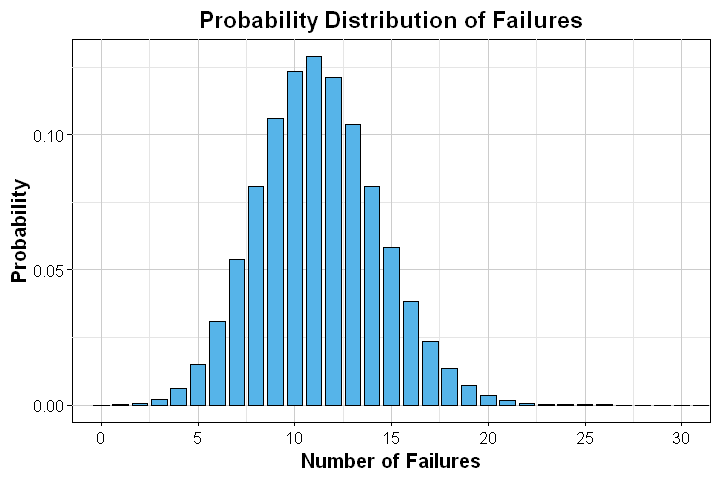

In [2]:
#i have two outcomes, disease or no disease. each screening is indipendent, so the binomial distribution describes the situation quite well.
sample_size = 75 #total number of trials
p_failure = 0.15

#i have only the accuracy of the old method, so i assume that the accuracy of the new method is the same for now.
y_values = seq(0,75) #all possible outcomes
probabilities = dbinom(y_values, sample_size, p_failure)
df = data.frame(y=y_values, probabilities=probabilities)

ggplot(df, aes(x=y, y=probabilities)) + #wanted to try some different visualizations ways as previous exercises. 
    geom_bar(stat="identity", width=0.8, fill="#56B4E9", color="black") +
    coord_cartesian(xlim=c(0, 30)) +
    labs(
        x="Number of Failures",
        y="Probability",
        title="Probability Distribution of Failures") +
    scale_x_continuous(breaks = seq(0, sample_size, by=5)) +
    #scale_y_continuous(expand = expansion(mult = c(0, 0.05))) + 
    theme(
        text = element_text(size=12),
        axis.title.x = element_text(face="bold", size=12),
        axis.title.y = element_text(face="bold", size=12),
        axis.text = element_text(color="black"),
        axis.ticks = element_line(color="black"),
        plot.title = element_text(hjust=0.5, face="bold", size=14),
        panel.background = element_rect(fill = "white", color = "black"),
        panel.grid.major = element_line(size=0.5, linetype='solid', color="grey80"),
        panel.grid.minor = element_line(size=0.25, linetype='solid', color="grey90"))

#some interesting infos
cat("The most probable number of failures in 75 attempts is:", df$y[which.max(df$probabilities)], '\n')
cat("The probability of getting 75 failures in 75 attempts with a 85% accuracy is:", df$probabilities[df$y == 75]) #0.15^75

b) On the n = 75 patients sample, the new method fails to detect the disease in y = 6 cases. What is the frequentist estimator of the failure probability of the new method?

In [3]:
y = 6
p_failure_new = y/sample_size
cat("The new failure probability is:", p_failure_new*100, "%")

The new failure probability is: 8 %

c) Setup a bayesian computation of the posterior probability, assuming a beta distribution with a mean value = 0.15 and a standard deviation = 0.14. Plot the posterior distribution for y, and mark on the plot the mean value and variance.

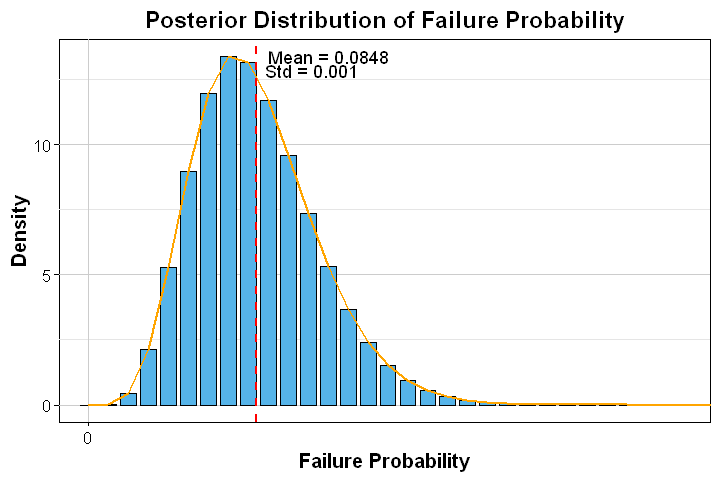

In [4]:
mean_prior = 0.15
std_prior = 0.14
ps = seq(0,1,length=100)

#mu = alpha / (alpha+beta)
#std^2 = alpha*beta / [(alpha + beta)^2 * (alpha + beta + 1)]

alpha_prior = (mean_prior * ((mean_prior * (1 - mean_prior)) / std_prior^2 - 1))
beta_prior = (1 - mean_prior) * ((mean_prior * (1 - mean_prior)) / std_prior^2 - 1)

alpha_post = alpha_prior + y
beta_post = beta_prior + sample_size - y

data_post = dbeta(ps, alpha_post, beta_post)
df_post = data.frame(ps=ps, data_post=data_post)

mean_post = alpha_post / (alpha_post + beta_post)
std_post = (alpha_post*beta_post) / ((alpha_post+beta_post)^2 * (alpha_post + beta_post + 1))

ggplot(df_post, aes(x=ps, y=data_post)) +
    geom_bar(stat="identity", width=0.008, fill="#56B4E9", color="black") +
    #geom_col(width=1/length(ps), fill="blue", color="black", alpha=0.5) +
    geom_line(color="orange", size=0.8) +
    geom_vline(xintercept=mean_post, color="red", linetype="dashed", size=0.8) +
    annotate("text", x=mean_post, y=max(df_post$data_post), label=paste("Mean =", round(mean_post, 4)), color="black", hjust=-0.1) +
    annotate("text", x=mean_post, y=max(df_post$data_post) - 0.5, label=paste("Std =", round(std_post, 4)), color = "black", hjust = -0.1) +
    coord_cartesian(xlim=c(0, 0.3)) +
    labs(x="Failure Probability",
         y="Density", 
         title="Posterior Distribution of Failure Probability") +
    scale_x_continuous(breaks = seq(0, sample_size, by=5)) +
    #scale_y_continuous(expand = expansion(mult = c(0, 0.05))) + 
    theme(text = element_text(size=12),
          axis.title.x = element_text(face="bold", size=12),
          axis.title.y = element_text(face="bold", size=12),
          axis.text = element_text(color="black"),
          axis.ticks = element_line(color="black"),
          plot.title = element_text(hjust=0.5, face="bold", size=14),
          panel.background = element_rect(fill = "white", color = "black"),
          panel.grid.major = element_line(size=0.5, linetype='solid', color="grey80"),
          panel.grid.minor = element_line(size=0.25, linetype='solid', color="grey90"))

d) Perform a test of hypothesis assuming that if the probability of failing to the detect the desease in
ill patients is greater or equal than 15%, the new test is no better that the traditional method. Test
the sample at a 5% level of significance in the Bayesian way.

In [5]:
p_limit = 0.15
new_posterior = 1 - pbeta(p_limit, alpha_post, beta_post)

los = 0.05
if (new_posterior > los) {
  cat("The new test isn't better than the standard method.\n")
} else {
  cat("The new test is better than the standard method.")
}

The new test is better than the standard method.

(e) Perform the same hypothesis test in the classical frequentist way.

In [6]:
z = (p_failure_new - p_failure) / sqrt((p_failure * (1 - p_failure)) / sample_size)
p_value = pnorm(z)

if (p_value > los) {
  cat("The new test isn't better than the standard method.\n")
} else {
  cat("The new test is better than the standard method.")
}

The new test is better than the standard method.

### Exercise 2

A researcher has collected n = 16 observations that are supposed to come from a Normal distribution with known variance $\sigma^2 = 4$:

4.09, 4.68, 1.87, 2.62, 5.58, 8.68, 4.07, 4.78, 4.79, 4.49, 5.85, 5.09, 2.40, 6.27, 6.30, 4.47

Assuming the prior is a step function 

$$
\begin{equation}
g(\mu) =
\begin{cases} 
    \mu & \text{for } 0 < \mu \leq 3 \\
    3 & \text{for } 3 < \mu \leq 5 \\
    8 - \mu & \text{for } 5 < \mu \leq 8 \\
    0 & \text{for } \mu > 8
\end{cases}
\end{equation}
$$ses}
\]

a) find the posterior distribution, the posterior mean and standard deviation

In [11]:
data = c(4.09, 4.68, 1.87, 2.62, 5.58, 8.68, 4.07, 4.78, 4.79, 4.49, 5.85, 5.09, 2.40, 6.27, 6.30, 4.47)
n =  length(data)

prior = function(mu) {
    if (0 < mu && mu <= 3) {
        g = mu
    }
    else if (3 < mu && mu <= 5) {
        g = 3
    }
    else if (5 < mu && mu <= 8) {
        g = 8 - mu
    }
    else if (mu > 8) {
        g = 0
    } 
    return(g)
}